In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import time 

UV_VALUE = 1
DIAG_VALUE = 10
ABOVE_DIAG_VALUE = 8
B_VALUE = 5

In [2]:
# For testing purposes, later on 

def create_full_matrix(dim=5):
    array = np.full((dim, dim), 1)
    for i in range(dim):
        array[i][i] = DIAG_VALUE
        if i < dim-1:
            array[i][i+1] = ABOVE_DIAG_VALUE
    return array

create_full_matrix(dim=10)

array([[10,  8,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 10,  8,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1, 10,  8,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, 10,  8,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1, 10,  8,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, 10,  8,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1, 10,  8,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1, 10,  8,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1, 10,  8],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1, 10]])

In [3]:
# Given our matrix is rare and has only 2 non-zero values, there's actually no need to store ANY of it in the memory, all we 
# need is to store solutions to our equations, which means two list of length N - so the memory storage is of O(n)
def solve_helper_matrix(dim=5, free_term=B_VALUE):
    ''' Solves Az=b where A is band matrix with values 9 diag and 7 ab diag in O(n) time'''
    result = [free_term/(DIAG_VALUE-1)]
    if dim == 1:
        return result
    while len(result) != dim:
        cur_value = (free_term - (ABOVE_DIAG_VALUE-1)*result[-1]) / (DIAG_VALUE-1)
        result.append(cur_value)
    result.reverse()
    return result

In [4]:
def find_rev_matrix(z_vector, q_vector):
    ''' Find reverse matrix using Sherman-Morrison formula w=z-(vzq/1+vq)'''
    numerator = sum(z_vector)
    denomi = 1 + sum(q_vector)
    return [z_cord - (numerator/denomi)*q_cord for z_cord, q_cord in zip(z_vector, q_vector)]


In [5]:
np.linalg.solve(create_full_matrix(dim=50), [5 for _ in range(50)])

array([0.07525844, 0.07525904, 0.07525827, 0.07525926, 0.07525799,
       0.07525963, 0.07525752, 0.07526023, 0.07525674, 0.07526122,
       0.07525546, 0.07526287, 0.07525334, 0.07526559, 0.07524985,
       0.07527009, 0.07524406, 0.07527753, 0.0752345 , 0.07528983,
       0.07521869, 0.07531015, 0.07519256, 0.07534375, 0.07514936,
       0.07539929, 0.07507795, 0.0754911 , 0.07495991, 0.07564287,
       0.07476477, 0.07589376, 0.0744422 , 0.07630849, 0.07390898,
       0.07699406, 0.07302753, 0.07812736, 0.07157043, 0.08000077,
       0.06916176, 0.08309763, 0.06518009, 0.08821693, 0.05859813,
       0.09667944, 0.04771776, 0.11066849, 0.02973183, 0.13379325])

In [6]:
z = solve_helper_matrix(dim=50, free_term=B_VALUE)
q = solve_helper_matrix(dim=50, free_term=UV_VALUE)
find_rev_matrix(z, q)

[0.07525844089350037,
 0.07525904117533852,
 0.07525826938440369,
 0.07525926168703423,
 0.07525798586936636,
 0.07525962620636797,
 0.07525751720165161,
 0.07526022877914401,
 0.07525674246522518,
 0.07526122486883524,
 0.07525546177847939,
 0.07526287146607977,
 0.07525334472487927,
 0.07526559339213704,
 0.07524984510566277,
 0.07527009290255826,
 0.07524406002083556,
 0.07527753086876468,
 0.0752344969214272,
 0.07528982628228972,
 0.07521868853260927,
 0.07531015135362709,
 0.07519255629803279,
 0.07534374994093965,
 0.07514935811434514,
 0.07539929046282379,
 0.07507794887192268,
 0.07549110234593842,
 0.07495990502220382,
 0.07564287300986267,
 0.07476477131144413,
 0.0758937592094108,
 0.07444220334059656,
 0.07630848945764337,
 0.07390897873572605,
 0.07699406394961972,
 0.07302752581747077,
 0.0781273605588052,
 0.07157043017708939,
 0.08000076923929544,
 0.0691617618736019,
 0.08309762848663654,
 0.06518008569844908,
 0.08821692642611872,
 0.058598131204829124,
 0.0966794393

In [15]:
# It's necessary to do it atleast several times per loop cause Windows timing function isn't precise enough to catch that small
# time invtervals 

n_values = np.linspace(50, 10**3, num=50, dtype=int)
time_results = []

for number in n_values:
    t0 = time.time()
    for _ in range(10):
        z = solve_helper_matrix(dim=number, free_term=B_VALUE)
        q = solve_helper_matrix(dim=number, free_term=UV_VALUE)
        find_rev_matrix(z, q)
    t1 = time.time()
    time_results.append(t1-t0)

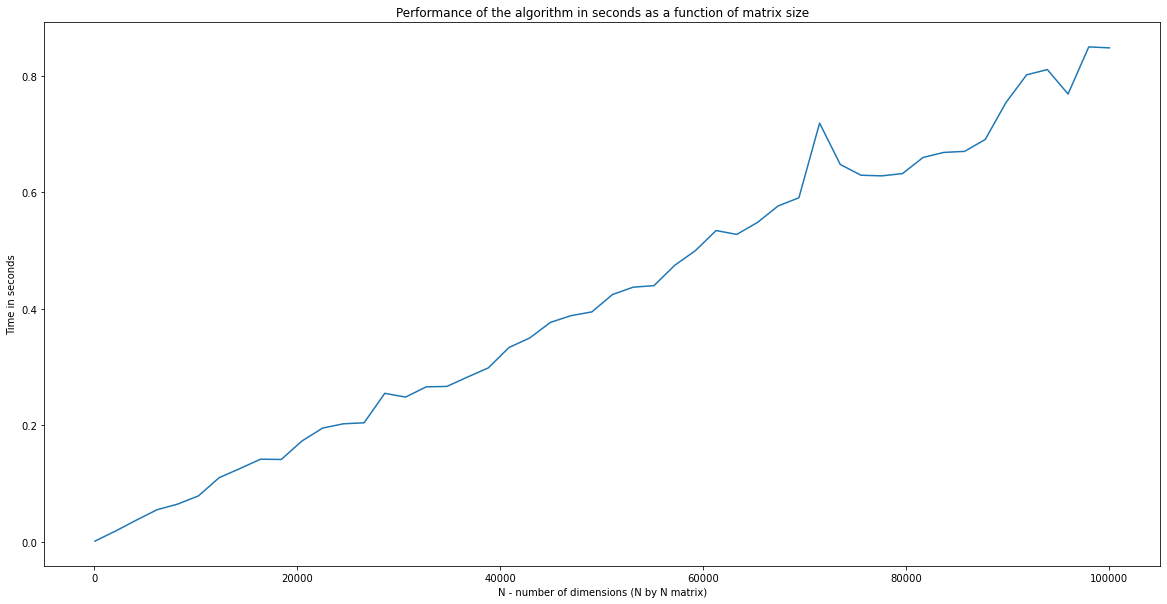

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(n_values, time_results);
ax.set_title('Performance of the algorithm in seconds as a function of matrix size');
ax.set_xlabel('N - number of dimensions (N by N matrix)');
ax.set_ylabel('Time in seconds');
plt.savefig('perf_plot.pdf')

In [13]:
lib_time_results = []

for number in n_values:
    t0 = time.time()
    for _ in range(10):
        np.linalg.solve(create_full_matrix(dim=int(number)), [5 for _ in range(number)])
    t1 = time.time()
    lib_time_results.append(t1-t0)

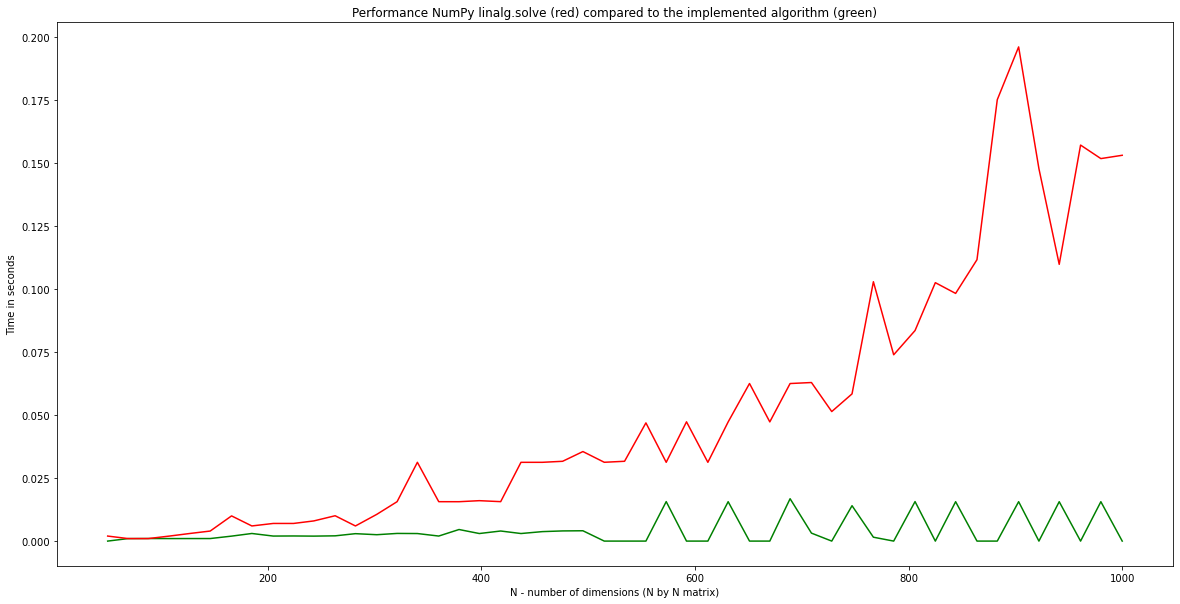

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(n_values, time_results, color='green')
ax.plot(n_values, lib_time_results, color='red');
ax.set_title('Performance NumPy linalg.solve (red) compared to the implemented algorithm (green)');
ax.set_xlabel('N - number of dimensions (N by N matrix)');
ax.set_ylabel('Time in seconds');
plt.savefig('lib_time.pdf')